In [1]:
import biom
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from qiime2 import Artifact
from qiime2.plugins import deicode
import seaborn as sns
from skbio.stats.distance import DistanceMatrix
from skbio.stats.ordination import OrdinationResults

In [2]:
plt.rcParams["figure.facecolor"] = "white"

In [3]:
soils_sim_url = "../data/simulated/qiita103/88_soils_filt_sim2.csv"
soils_sim_df = pd.read_csv(soils_sim_url, index_col=0)
soils_sim_df.head()

,X4479946,X547831,X4436710,X244331,X4479940,X4355812,X1124709,X561174,X1126562,X623634,...,X4440143,X834567,X4326975,X556028,X770450,X1673347,X160412,X222810,X3893085,X2063454
103.LQ3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
103.PE4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
103.MT2,0,0,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
103.SK1,2,0,0,0,1,0,0,2,2,1,...,1,0,5,2,0,0,0,0,0,3
103.AR1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [4]:
sample_names = list(soils_sim_df.index)
feature_names = list(soils_sim_df.columns)
soils_sim_biom = biom.table.Table(soils_sim_df.T.values, feature_names, sample_names)
soils_sim_biom

9324 x 88 <class 'biom.table.Table'> with 141831 nonzero entries (17% dense)

In [5]:
soils_sim_qza = Artifact.import_data("FeatureTable[Frequency]", soils_sim_biom)
soils_sim_qza.view(pd.DataFrame).head()

,X4479946,X547831,X4436710,X244331,X4479940,X4355812,X1124709,X561174,X1126562,X623634,...,X4440143,X834567,X4326975,X556028,X770450,X1673347,X160412,X222810,X3893085,X2063454
103.LQ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103.PE4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103.MT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103.SK1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,...,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
103.AR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [6]:
ordination, samp_dist, feat_dist = deicode.actions.rpca(
    table=soils_sim_qza,
    n_components=2,
)

samp_dist, feat_dist = [x.view(DistanceMatrix) for x in (samp_dist, feat_dist)]

/home/grahman/.conda/envs/rpca_cooc/lib/python3.6/site-packages/biom/table.py:4049: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  for r in self.matrix_data.tocsr()]
/home/grahman/.conda/envs/rpca_cooc/lib/python3.6/site-packages/biom/table.py:4052: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return constructor(mat, index=index, columns=columns)
/home/grahman/.conda/envs/rpca_cooc/lib/python3.6/site-packages/pandas/core/sparse/frame.py:854: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are Spars

In [7]:
ordination_df = ordination.view(OrdinationResults).samples
ordination_df.drop(columns=[2], inplace=True)
ordination_df.rename(columns={0: "PC1", 1: "PC2"}, inplace=True)
assert ordination_df.shape == (88, 2)

ordination_df.head()

,PC1,PC2
103.LQ3,-0.124036,-0.054683
103.PE4,0.020861,-0.001273
103.MT2,0.113226,0.112197
103.SK1,-0.030439,-0.119333
103.AR1,-0.061593,0.086647


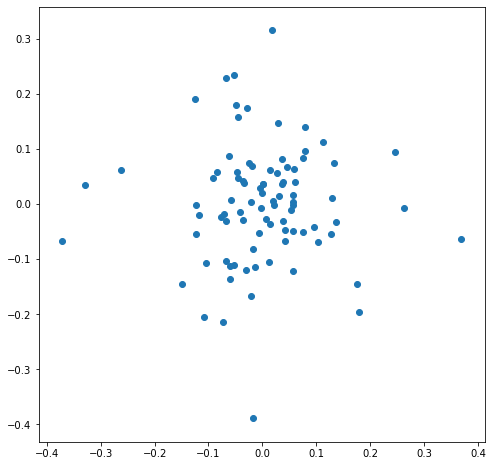

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(
    ordination_df["PC1"],
    ordination_df["PC2"],
)

plt.show()

In [9]:
feat_dist_df = feat_dist.to_data_frame().to_dense()
feat_dist_df.iloc[:5, :5]

/home/grahman/.conda/envs/rpca_cooc/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,X4479946,X547831,X4436710,X244331,X4479940
X4479946,0.000000,1.254509,2.887244,0.799362,1.217175
X547831,1.254509,0.000000,3.162887,0.596787,0.303323
X4436710,2.887244,3.162887,0.000000,3.282724,3.406663
X244331,0.799362,0.596787,3.282724,0.000000,0.441157
X4479940,1.217175,0.303323,3.406663,0.441157,0.000000


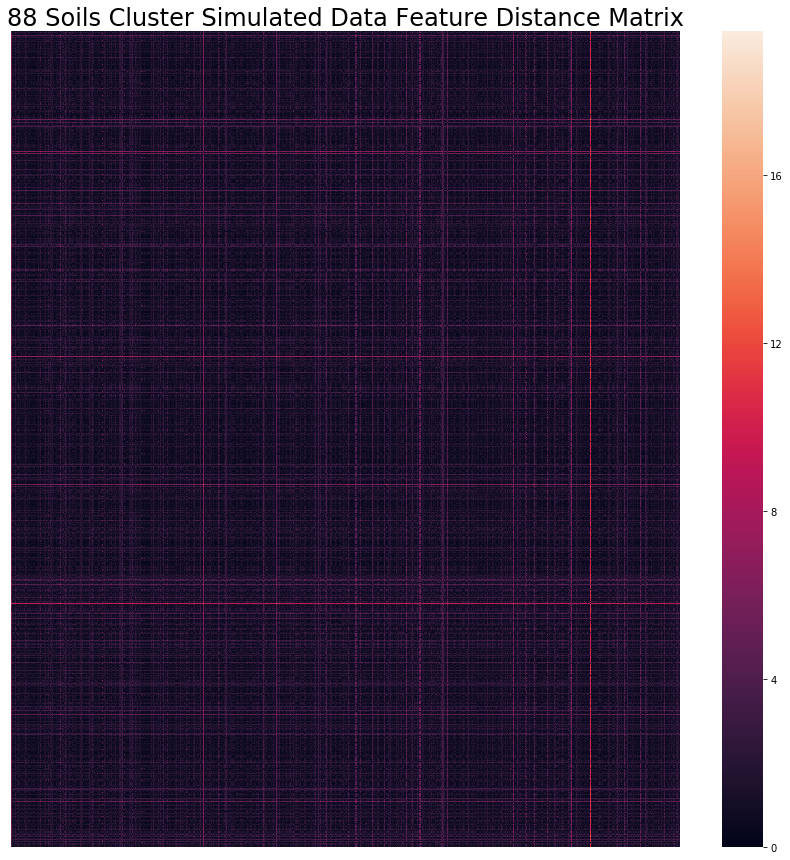

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

sns.heatmap(
    feat_dist_df,
    ax = ax,
)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title("88 Soils Cluster Simulated Data Feature Distance Matrix", fontsize=24)

plt.show()

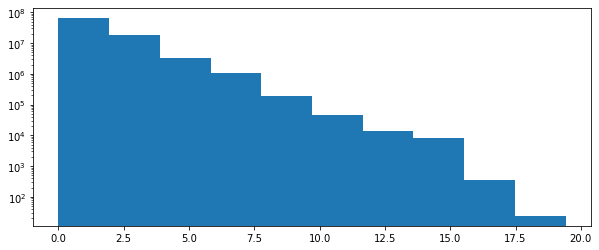

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.hist(
    feat_dist_df.values.flatten(),
)

ax.set_yscale("log")